# Broadcasting and Advanced Indexing

<b> There are no new functions or attributes used in this sheet!</b>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Basic Broadcasting 

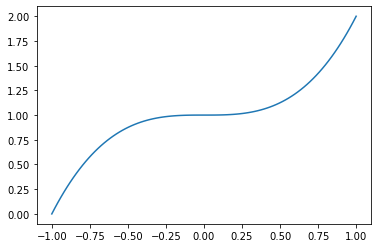

In [13]:
# Add constants to vectors
x_values = np.linspace(-1, 1, 100)
y_values = x_values ** 3 + 1
plt.plot(x_values, y_values)

In [14]:
# Make a 5x5 matrix consisting of sevens:
matrix_of_ones = np.ones((5, 5))
matrix_of_sevens = matrix_of_ones * 7
print(matrix_of_sevens)

[[7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]]


In [15]:
# Matrix + vector is often not possible
#matrix_of_sevens + np.arange(25)

In [16]:
# It is sometimes possible:
matrix_of_sevens + np.arange(5)

array([[ 7.,  8.,  9., 10., 11.],
       [ 7.,  8.,  9., 10., 11.],
       [ 7.,  8.,  9., 10., 11.],
       [ 7.,  8.,  9., 10., 11.],
       [ 7.,  8.,  9., 10., 11.]])

When is broadcasting possible?

### Broadcasting Rules

In [37]:
# Setup
matrix = np.zeros((3, 7)) # (3, 7)
vector = np.arange(1, 8) # (7,)

print("Our Matrix: \n", matrix)
print("\nOur Vector: \n", vector)

Our Matrix: 
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Our Vector: 
 [1 2 3 4 5 6 7]


In [18]:
# Can we add matrix and vector?

# 1. Padding (adding ones to the left of the smaller one)
# (7,) -> (1, 7)

# 3. Comparison (either equal, or one of them are one)
# (3, 7)
# (1, 7)

# Yes!

print(matrix + vector)

[[1. 2. 3. 4. 5. 6. 7.]
 [1. 2. 3. 4. 5. 6. 7.]
 [1. 2. 3. 4. 5. 6. 7.]]


In [19]:
# A non-example
matrix = np.zeros((3, 8)) # (3, 8) -> (3, 8)
vector = np.arange(1, 13) #  (12,) -> (1, 12)

# print(matrix + vector) <-- Results in an error

In [20]:
# Sometimes broadcasting does not work, but we want it to
matrix = np.zeros((7, 3)) # (7, 3) <- (7, 3)
vector = np.arange(1, 8) #    (7,) <- (1, 7)

print("This is the matrix: ", matrix)
print("This is the vector: ", vector)

# matrix + vector <-- results in an error

This is the matrix:  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
This is the vector:  [1 2 3 4 5 6 7]


In [21]:
# We can insert an axis with np.newaxis to make it work
vector = vector[:, np.newaxis]
vector.shape

(7, 1)

In [22]:
matrix + vector # Now this works

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.]])

### 2D Slicing

In [23]:
# Short Recap
vector = np.arange(10)
vector[3:7:2]

array([3, 5])

In [24]:
# What about matrices? Same Principle!
matrix = np.arange(25).reshape(5, 5)
matrix 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [25]:
upper_2x2_corner = matrix[:2, :2]
print(upper_2x2_corner)

[[0 1]
 [5 6]]


In [26]:
lower_2x2_corner = matrix[3:, 3:]
print(lower_2x2_corner)

[[18 19]
 [23 24]]


In [27]:
every_second_entry = matrix[::2, ::2]
print(every_second_entry)

[[ 0  2  4]
 [10 12 14]
 [20 22 24]]


### Advanced Indexing

In [28]:
# We cannot pick any submatrix of a matrix with slicing
matrix

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [29]:
# Indexing by passing in lists
matrix[[0, 1, 4], :]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24]])

In [30]:
# Boolean indexing
matrix > 15 # Gives a matrix of boolean values

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [31]:
matrix[matrix > 15] # Gives me all values back (truncated)

array([16, 17, 18, 19, 20, 21, 22, 23, 24])

In [32]:
matrix[(matrix > 15) & (matrix < 20)] # Can ask for multiple conditions

array([16, 17, 18, 19])

In [33]:
matrix[(matrix > 15) | (matrix < 3)] # Can ask to satisfy one of two conditions

array([ 0,  1,  2, 16, 17, 18, 19, 20, 21, 22, 23, 24])